# Are you on PC or MAC? pc = 0, mac = 1

In [13]:
computer = 1

# IF YOU RUN THIS PAGE FOR THE FIRST TIME : 

# START HERE

# OTHERWISE, YOU CAN START BELOW TO AVOID FETCHING ALL THE DATA AGAIN

In [14]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime
import pandas as pd
import os
import csv
import glob as glob
import tensorflow as tf

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [26]:
ROOTPATH = os.getcwd()
path = os.path.join(ROOTPATH, 'Data')

if not os.path.exists(path):
    os.makedirs(aimed_directory)

os.chdir(path)

# 1) This first part is only accessing in a list all the tickers in our fund, via a csv

In [112]:
# In the file IBB_holdings.csv, the tickers are sorted by descending weigths as of 5-Feb-18
# The file contains a lot of information about the fund IBB as of 5-Feb-18, which can be imported via row[i], i being the column you want
# For now we only import the first column, tickers.

if computer == 0:
    with open('IBB_holdings.csv', 'r') as csvfile:
        file = csv.reader(csvfile, delimiter=' ')
        c=0
        list_tickers=[]
        for row in file:
            if c >= 11:
                list_tickers.append(row[0].split(',')[0])
            c+=1
else:
    with open('IBB_holdings.csv', 'r', encoding ='mac_roman') as csvfile:
        file = csv.reader(csvfile, delimiter=' ')
        c=0
        list_tickers=[]
        for row in file:
            if c >= 11:
                list_tickers.append(row[0].split(',')[0])
            c+=1
            
list_tickers.sort()
list_tickers.pop()
list_tickers.remove("BLKFDS")
list_tickers.remove("USD")
list_tickers.remove("SNDX")

# 2) We now want to download the data of all tickers as dataframes

In [113]:
# Setting up the variables

start_date = '2016-01-01'
end_date = '2018-01-01'


nb_tickers = len(list_tickers)
list_dataframes=[None]*(nb_tickers)

In [114]:
#On Yahoo
still_missing = nb_tickers
passages=0

while still_missing > 0 and passages < 100:
    passages += 1
    print("harvest number " , passages)
    for i in range (nb_tickers ):
        if type(list_dataframes[i]) == type(None):   
            symbol = list_tickers[i]
            try:
                df = web.DataReader(symbol, 'yahoo' , start_date ,end_date)
                list_dataframes[i] = df
                still_missing -= 1
            except:
                print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])

harvest number  1
Oops!  That was no valid ticker.  Try again... ABUS
Oops!  That was no valid ticker.  Try again... ACAD
Oops!  That was no valid ticker.  Try again... ACHN
Oops!  That was no valid ticker.  Try again... ACOR
Oops!  That was no valid ticker.  Try again... ACRS
Oops!  That was no valid ticker.  Try again... ADAP
Oops!  That was no valid ticker.  Try again... ADMS
Oops!  That was no valid ticker.  Try again... ADRO
Oops!  That was no valid ticker.  Try again... AERI
Oops!  That was no valid ticker.  Try again... AGIO
Oops!  That was no valid ticker.  Try again... AIMT
Oops!  That was no valid ticker.  Try again... AKAO
Oops!  That was no valid ticker.  Try again... AKBA
Oops!  That was no valid ticker.  Try again... AKCA
Oops!  That was no valid ticker.  Try again... ALDR
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... ALXN
Oops!  That was no valid ticker.  Try again...

Oops!  That was no valid ticker.  Try again... AGIO
Oops!  That was no valid ticker.  Try again... AIMT
Oops!  That was no valid ticker.  Try again... AKAO
Oops!  That was no valid ticker.  Try again... AKBA
Oops!  That was no valid ticker.  Try again... AKCA
Oops!  That was no valid ticker.  Try again... ALDR
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... ALXN
Oops!  That was no valid ticker.  Try again... AMAG
Oops!  That was no valid ticker.  Try again... AMGN
Oops!  That was no valid ticker.  Try again... AMPH
Oops!  That was no valid ticker.  Try again... AMRN
Oops!  That was no valid ticker.  Try again... ANAB
Oops!  That was no valid ticker.  Try again... ANIP
Oops!  That was no valid ticker.  Try again... ARDX
Oops!  That was no valid ticker.  Try again... ARNA
Oops!  That was no valid ticker.  Try again... ARRY
Oops!  That was no valid ticker.  Try again... ARWR
Oops!  That 

Oops!  That was no valid ticker.  Try again... NERV
Oops!  That was no valid ticker.  Try again... NH
Oops!  That was no valid ticker.  Try again... NK
Oops!  That was no valid ticker.  Try again... NKTR
Oops!  That was no valid ticker.  Try again... NLNK
Oops!  That was no valid ticker.  Try again... NSTG
Oops!  That was no valid ticker.  Try again... NTLA
Oops!  That was no valid ticker.  Try again... NVAX
Oops!  That was no valid ticker.  Try again... NVCR
Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was n

Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was no valid ticker.  Try again... PRTK
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... QURE
Oops!  That was no valid ticker.  Try again... RARE
Oops!  That was no valid ticker.  Try again... RARX
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That w

Oops!  That was no valid ticker.  Try again... LGND
Oops!  That was no valid ticker.  Try again... LMNX
Oops!  That was no valid ticker.  Try again... LOXO
Oops!  That was no valid ticker.  Try again... LXRX
Oops!  That was no valid ticker.  Try again... MCRB
Oops!  That was no valid ticker.  Try again... MDCO
Oops!  That was no valid ticker.  Try again... MEDP
Oops!  That was no valid ticker.  Try again... MGNX
Oops!  That was no valid ticker.  Try again... MNKD
Oops!  That was no valid ticker.  Try again... MNTA
Oops!  That was no valid ticker.  Try again... MRNS
Oops!  That was no valid ticker.  Try again... MRSN
Oops!  That was no valid ticker.  Try again... MYGN
Oops!  That was no valid ticker.  Try again... MYL
Oops!  That was no valid ticker.  Try again... MYOK
Oops!  That was no valid ticker.  Try again... NBIX
Oops!  That was no valid ticker.  Try again... NBRV
Oops!  That was no valid ticker.  Try again... NEOS
Oops!  That was no valid ticker.  Try again... NERV
Oops!  That w

Oops!  That was no valid ticker.  Try again... AVXS
Oops!  That was no valid ticker.  Try again... AXON
Oops!  That was no valid ticker.  Try again... BCRX
Oops!  That was no valid ticker.  Try again... BGNE
Oops!  That was no valid ticker.  Try again... BIIB
Oops!  That was no valid ticker.  Try again... BIVV
Oops!  That was no valid ticker.  Try again... BLCM
Oops!  That was no valid ticker.  Try again... BLUE
Oops!  That was no valid ticker.  Try again... BMRN
Oops!  That was no valid ticker.  Try again... BOLD
Oops!  That was no valid ticker.  Try again... BPMC
Oops!  That was no valid ticker.  Try again... CALA
Oops!  That was no valid ticker.  Try again... CARA
Oops!  That was no valid ticker.  Try again... CASC
Oops!  That was no valid ticker.  Try again... CBPO
Oops!  That was no valid ticker.  Try again... CCXI
Oops!  That was no valid ticker.  Try again... CELG
Oops!  That was no valid ticker.  Try again... CERS
Oops!  That was no valid ticker.  Try again... CHRS
Oops!  That 

Oops!  That was no valid ticker.  Try again... CCXI
Oops!  That was no valid ticker.  Try again... CELG
Oops!  That was no valid ticker.  Try again... CERS
Oops!  That was no valid ticker.  Try again... CHRS
Oops!  That was no valid ticker.  Try again... CLDX
Oops!  That was no valid ticker.  Try again... CLLS
Oops!  That was no valid ticker.  Try again... CLVS
Oops!  That was no valid ticker.  Try again... CLXT
Oops!  That was no valid ticker.  Try again... CMRX
Oops!  That was no valid ticker.  Try again... CNCE
Oops!  That was no valid ticker.  Try again... COLL
Oops!  That was no valid ticker.  Try again... CORI
Oops!  That was no valid ticker.  Try again... CRBP
Oops!  That was no valid ticker.  Try again... CRIS
Oops!  That was no valid ticker.  Try again... CRSP
Oops!  That was no valid ticker.  Try again... CRVS
Oops!  That was no valid ticker.  Try again... CTMX
Oops!  That was no valid ticker.  Try again... CYTK
Oops!  That was no valid ticker.  Try again... DBVT
Oops!  That 

Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was no valid ticker.  Try again... PRTK
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... QURE
Oops!  That was no valid ticker.  Try again... RARE
Oops!  That was no valid ticker.  Try again... RARX
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That w

Oops!  That was no valid ticker.  Try again... NK
Oops!  That was no valid ticker.  Try again... NKTR
Oops!  That was no valid ticker.  Try again... NLNK
Oops!  That was no valid ticker.  Try again... NSTG
Oops!  That was no valid ticker.  Try again... NTLA
Oops!  That was no valid ticker.  Try again... NVAX
Oops!  That was no valid ticker.  Try again... NVCR
Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was

Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... QURE
Oops!  That was no valid ticker.  Try again... RARE
Oops!  That was no valid ticker.  Try again... RARX
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That was no valid ticker.  Try again... REGN
Oops!  That was no valid ticker.  Try again... RETA
Oops!  That was no valid ticker.  Try again... RGEN
Oops!  That was no valid ticker.  Try again... RGNX
Oops!  That was no valid ticker.  Try again... RIGL
Oops!  That was no valid ticker.  Try again... RTRX
Oops!  That was no valid ticker.  Try again... RVNC
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... SBBP
Oops!  That was no valid ticker.  Try again... SCMP
Oops!  That was no valid ticker.  Try again... SGEN
Oops!  That was no valid ticker.  Try again... SGMO
Oops!  That was no valid ticker.  Try again... SGYP
Oops!  That 

Oops!  That was no valid ticker.  Try again... CRBP
Oops!  That was no valid ticker.  Try again... CRIS
Oops!  That was no valid ticker.  Try again... CRSP
Oops!  That was no valid ticker.  Try again... CRVS
Oops!  That was no valid ticker.  Try again... CTMX
Oops!  That was no valid ticker.  Try again... CYTK
Oops!  That was no valid ticker.  Try again... DBVT
Oops!  That was no valid ticker.  Try again... DEPO
Oops!  That was no valid ticker.  Try again... DERM
Oops!  That was no valid ticker.  Try again... DOVA
Oops!  That was no valid ticker.  Try again... ECYT
Oops!  That was no valid ticker.  Try again... EDIT
Oops!  That was no valid ticker.  Try again... EGRX
Oops!  That was no valid ticker.  Try again... ENDP
Oops!  That was no valid ticker.  Try again... ENTA
Oops!  That was no valid ticker.  Try again... EPZM
Oops!  That was no valid ticker.  Try again... ESPR
Oops!  That was no valid ticker.  Try again... EXEL
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That 

Oops!  That was no valid ticker.  Try again... NLNK
Oops!  That was no valid ticker.  Try again... NSTG
Oops!  That was no valid ticker.  Try again... NTLA
Oops!  That was no valid ticker.  Try again... NVAX
Oops!  That was no valid ticker.  Try again... NVCR
Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was no valid ticker.  Try again... PRTK
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That w

Oops!  That was no valid ticker.  Try again... SGYP
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... SNNA
Oops!  That was no valid ticker.  Try again... SPPI
Oops!  That was no valid ticker.  Try again... SRPT
Oops!  That was no valid ticker.  Try again... SUPN
Oops!  That was no valid ticker.  Try again... SVRA
Oops!  That was no valid ticker.  Try again... SYNH
Oops!  That was no valid ticker.  Try again... TBPH
Oops!  That was no valid ticker.  Try again... TECH
Oops!  That was no valid ticker.  Try again... TLGT
Oops!  That was no valid ticker.  Try again... TOCA
Oops!  That was no valid ticker.  Try again... TSRO
Oops!  That was no valid ticker.  Try again... TTPH
Oops!  That was no valid ticker.  Try again... TXMD
Oops!  That was no valid ticker.  Try again... UTHR
Oops!  That was no valid ticker.  Try again... VCYT
Oops!  That was no valid ticker.  Try again... VNDA
Oops!  That was no valid ticker.  Try again... VRTX
Oops!  That 

Oops!  That was no valid ticker.  Try again... SGMO
Oops!  That was no valid ticker.  Try again... SGYP
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... SNNA
Oops!  That was no valid ticker.  Try again... SPPI
Oops!  That was no valid ticker.  Try again... SRPT
Oops!  That was no valid ticker.  Try again... SUPN
Oops!  That was no valid ticker.  Try again... SVRA
Oops!  That was no valid ticker.  Try again... SYNH
Oops!  That was no valid ticker.  Try again... TBPH
Oops!  That was no valid ticker.  Try again... TECH
Oops!  That was no valid ticker.  Try again... TLGT
Oops!  That was no valid ticker.  Try again... TOCA
Oops!  That was no valid ticker.  Try again... TSRO
Oops!  That was no valid ticker.  Try again... TTPH
Oops!  That was no valid ticker.  Try again... TXMD
Oops!  That was no valid ticker.  Try again... UTHR
Oops!  That was no valid ticker.  Try again... VCYT
Oops!  That was no valid ticker.  Try again... VNDA
Oops!  That 

Oops!  That was no valid ticker.  Try again... HZNP
Oops!  That was no valid ticker.  Try again... ICPT
Oops!  That was no valid ticker.  Try again... ILMN
Oops!  That was no valid ticker.  Try again... IMGN
Oops!  That was no valid ticker.  Try again... IMMU
Oops!  That was no valid ticker.  Try again... INCY
Oops!  That was no valid ticker.  Try again... INO
Oops!  That was no valid ticker.  Try again... INSM
Oops!  That was no valid ticker.  Try again... INSY
Oops!  That was no valid ticker.  Try again... INVA
Oops!  That was no valid ticker.  Try again... IONS
Oops!  That was no valid ticker.  Try again... IOVA
Oops!  That was no valid ticker.  Try again... IRWD
Oops!  That was no valid ticker.  Try again... ITCI
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... JNCE
Oops!  That was no valid ticker.  Try again... JUNO
Oops!  That was no valid ticker.  Try again... KALA
Oops!  That was no valid ticker.  Try again... KPTI
Oops!  That w

Oops!  That was no valid ticker.  Try again... AKAO
Oops!  That was no valid ticker.  Try again... AKBA
Oops!  That was no valid ticker.  Try again... AKCA
Oops!  That was no valid ticker.  Try again... ALDR
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... ALXN
Oops!  That was no valid ticker.  Try again... AMAG
Oops!  That was no valid ticker.  Try again... AMGN
Oops!  That was no valid ticker.  Try again... AMPH
Oops!  That was no valid ticker.  Try again... AMRN
Oops!  That was no valid ticker.  Try again... ANAB
Oops!  That was no valid ticker.  Try again... ANIP
Oops!  That was no valid ticker.  Try again... ARDX
Oops!  That was no valid ticker.  Try again... ARNA
Oops!  That was no valid ticker.  Try again... ARRY
Oops!  That was no valid ticker.  Try again... ARWR
Oops!  That was no valid ticker.  Try again... ASND
Oops!  That was no valid ticker.  Try again... ATNX
Oops!  That 

Oops!  That was no valid ticker.  Try again... MNKD
Oops!  That was no valid ticker.  Try again... MNTA
Oops!  That was no valid ticker.  Try again... MRNS
Oops!  That was no valid ticker.  Try again... MRSN
Oops!  That was no valid ticker.  Try again... MYGN
Oops!  That was no valid ticker.  Try again... MYL
Oops!  That was no valid ticker.  Try again... MYOK
Oops!  That was no valid ticker.  Try again... NBIX
Oops!  That was no valid ticker.  Try again... NBRV
Oops!  That was no valid ticker.  Try again... NEOS
Oops!  That was no valid ticker.  Try again... NERV
Oops!  That was no valid ticker.  Try again... NH
Oops!  That was no valid ticker.  Try again... NK
Oops!  That was no valid ticker.  Try again... NKTR
Oops!  That was no valid ticker.  Try again... NLNK
Oops!  That was no valid ticker.  Try again... NSTG
Oops!  That was no valid ticker.  Try again... NTLA
Oops!  That was no valid ticker.  Try again... NVAX
Oops!  That was no valid ticker.  Try again... NVCR
Oops!  That was n

Oops!  That was no valid ticker.  Try again... CRVS
Oops!  That was no valid ticker.  Try again... CTMX
Oops!  That was no valid ticker.  Try again... CYTK
Oops!  That was no valid ticker.  Try again... DBVT
Oops!  That was no valid ticker.  Try again... DEPO
Oops!  That was no valid ticker.  Try again... DERM
Oops!  That was no valid ticker.  Try again... DOVA
Oops!  That was no valid ticker.  Try again... ECYT
Oops!  That was no valid ticker.  Try again... EDIT
Oops!  That was no valid ticker.  Try again... EGRX
Oops!  That was no valid ticker.  Try again... ENDP
Oops!  That was no valid ticker.  Try again... ENTA
Oops!  That was no valid ticker.  Try again... EPZM
Oops!  That was no valid ticker.  Try again... ESPR
Oops!  That was no valid ticker.  Try again... EXEL
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That was no valid ticker.  Try again... FLXN
Oops!  That was no valid ticker.  Try again... FMI
Oops!  That was no valid ticker.  Try again... FOLD
Oops!  That w

Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was no valid ticker.  Try again... PRTK
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... QURE
Oops!  That was no valid ticker.  Try again... RARE
Oops!  That was no valid ticker.  Try again... RARX
Oops!  That was no valid ticker.  Try again... RDUS
Oops!  That was no valid ticker.  Try again... REGN
Oops!  That was no valid ticker.  Try again... RETA
Oops!  That was no valid ticker.  Try again... RGEN
Oops!  That was no valid ticker.  Try again... RGNX
Oops!  That was no valid ticker.  Try again... RIGL
Oops!  That was no valid ticker.  Try again... RTRX
Oops!  That 

Oops!  That was no valid ticker.  Try again... NTLA
Oops!  That was no valid ticker.  Try again... NVAX
Oops!  That was no valid ticker.  Try again... NVCR
Oops!  That was no valid ticker.  Try again... OMER
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... PACB
Oops!  That was no valid ticker.  Try again... PBYI
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... PDLI
Oops!  That was no valid ticker.  Try again... PETQ
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... PGNX
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... PRTA
Oops!  That was no valid ticker.  Try again... PRTK
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... QURE
Oops!  That w

# 3) Finally, we can download in a new folder all this information for future use, to avoid downloading them from the web again

In [115]:
#Download of the dataframes as as many csv's (for now)
for i in range (nb_tickers ):  
    file_name = 'csv_' + list_tickers[i] + '_from_' + start_date + '_to_' + end_date + ".csv"
    string = path + '\\' + file_name
    list_dataframes[i].to_csv(string , sep=',')

AttributeError: 'NoneType' object has no attribute 'to_csv'

# 4) This program is not (yet) collecting the two tickers that are not equities : BLKFDS and USD

# 5) We also need a benchmark

In [ ]:
# Here the benchmark is NASDAQ Biotechnology index 
symbol='^NBI'
benchmark1 = web.DataReader(symbol, 'yahoo' , start_date ,end_date)

In [ ]:
# Here the benchmark is iShares Nasdaq Biotechnology ETF 
symbol='IBB'
benchmark2 = web.DataReader(symbol, 'yahoo' , start_date ,end_date)

# 6) Now we need rate of returns

In [ ]:
df_ror_1 = benchmark1['High'].pct_change()
df_ror_2 = benchmark2['High'].pct_change()

In [116]:
# Both benchmarks should have similar rate of returns, though they have different prices
plt.plot(df_ror_1)
plt.hold
plt.plot(df_ror_2)
plt.show;

NameError: name 'df_ror_1' is not defined

In [117]:
def rateOfReturnWeekly(df,column):
    # Column has to be a column of the dataframe (ie 'Open','AdjClose')
    
    # Making sure dataframe is well sorted
    df_sorted = df.sort_index( ascending = True )
    

    # So far gives daily as shift = 1!
    shift = 1
    df_shifted = df_sorted.shift(shift)
    rate_of_returns = (df_sorted - df_shifted) / df_shifted
    rate_of_returns = rate_of_returns.drop(rate_of_returns.index[0])

    return rate_of_returns

# 7) Function to add noise to a dataframe (a new dataframe will be created)

In [118]:
def add_noise_2(df_origin, tick, mean = 0, std = 0.005):
    noise = []
    
    # Creating the noise
    for i in range(len(df_origin)):
        x = np.exp(np.random.normal(mean,std))
        noise.append(x)
        
    aimed_directory = path
    df_modified = df_origin.copy()
    df_modified['Adj Close'] = df_modified['Adj Close'].multiply(noise)
    
    file_name = 'csv_' + tick + '_B_' + str(mean) + '_' + str(std) + '_from_' + start_date + '_to_' + end_date + '.csv'
    string = aimed_directory + file_name
    df_modified.to_csv(os.path.join(path,file_name), sep=',') 

# 8) Create all the new csv

In [121]:
allFiles = glob.glob(path + "/csv" + "*.csv")


i=0
if computer == 0:
    for file_ in allFiles:
        with open(file_, 'r') as csvfile:
            if list_tickers[i] != 'SNDX':
                df = pd.read_csv(csvfile, index_col=None, header=0)
                add_noise_2(df,list_tickers[i],0,0.01)
                #add_noise_2(df,list_tickers[i],0,0.008)
                #add_noise_2(df,list_tickers[i],0,0.0003)
                #add_noise_2(df,list_tickers[i],0,0.002)
                #add_noise_2(df,list_tickers[i],0,0.0006)
            i=i+1
    
if computer == 1:    
    for file_ in allFiles:
        with open(file_, 'r', encoding ='mac_roman') as csvfile:
            if list_tickers[i] != 'SNDX':
                df = pd.read_csv(csvfile, index_col=None, header=0)
                add_noise_2(df,list_tickers[i],0,0.01)
                #add_noise_2(df,list_tickers[i],0,0.008)
                #add_noise_2(df,list_tickers[i],0,0.0003)
                #add_noise_2(df,list_tickers[i],0,0.002)
                #add_noise_2(df,list_tickers[i],0,0.0006)
            i=i+1

IndexError: list index out of range

# IF YOU RUN THIS PAGE FOR THE SECOND TIME : 

# START HERE

In [55]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime
import pandas as pd
import os
import csv
import glob as glob
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [56]:
# Comprehensive way to set the wd to Data directory

ROOTPATH = os.getcwd()

if not(ROOTPATH[-4:] == 'Data'):
    path = os.path.join(ROOTPATH, 'Data')
else:
    path = ROOTPATH

os.chdir(path)

In [58]:
if computer == 0:
    with open('IBB_holdings.csv', 'r') as csvfile:
        file = csv.reader(csvfile,delimiter=' ')
        c=0
        list_tickers=[]
        for row in file:
            if c>=11:
                list_tickers.append(row[0].split(',')[0])
            c+=1

if computer == 1:
    with open('IBB_holdings.csv', 'r', encoding ='mac_roman') as csvfile:
        file = csv.reader(csvfile,delimiter=' ')
        c=0
        list_tickers=[]
        for row in file:
            if c>=11:
                list_tickers.append(row[0].split(',')[0])
            c+=1            

list_tickers.sort()
list_tickers.pop()
list_tickers.remove("BLKFDS")
list_tickers.remove("USD")
list_tickers.remove("SNDX")

In [60]:
nb_tickers = len(list_tickers)
list_dataframes=[None]*(2*nb_tickers+1) #SNDX
data = np.array([np.zeros(503)]*(2*nb_tickers)) 

allFiles = glob.glob(path + "/csv" + "*.csv")

i = 0
compt = 0
if computer == 0:
    for file_ in allFiles:
        with open(file_, 'r') as csvfile:
            df = pd.read_csv(csvfile, index_col=None, header=0)
            list_dataframes[i] = df
            arr = np.array(df['Adj Close'])
            if len(arr) == 503 and not df.isnull().values.any():    
                mini = np.min(arr)
                maxi = np.max(arr)
                arr = (arr - mini) / (maxi - mini)
                data[i] = arr
                i += 1
            else :
                compt += 1

if computer == 1:
    for file_ in allFiles:
        with open(file_, 'r', encoding ='mac_roman') as csvfile:
            df = pd.read_csv(csvfile, index_col=None, header=0)
            list_dataframes[i] = df
            arr = np.array(df['Adj Close'])
            if len(arr) == 503 and not df.isnull().values.any():    
                mini = np.min(arr)
                maxi = np.max(arr)
                arr = (arr - mini) / (maxi - mini)
                data[i] = arr
                i += 1
            else :
                compt += 1            
    
data = data[:-compt]  

np.random.shuffle(data)   

train_set = data[:-50]
test_set = data[-50:-25]
validation_set = data[-25:]

# 9) Set up the autoencoder

In [61]:
def next_batch(batch_size, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.array(data_shuffle), np.array(labels_shuffle)

In [71]:
# Training Parameters
learning_rate = 0.001
num_steps = 3000
batch_size = 100
lambd = .5

display_step = 100
examples_to_show = 10

# Network Parameters 

num_hidden_1 = 250 # 1st layer num features
#num_hidden_2 = 200 # 2nd layer num features (the latent dim)
num_input = 503 # 503 days considered


In [72]:
X = tf.placeholder("float", [None, num_input])
learning = tf.placeholder("float")

In [73]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1],mean=0.0,
    stddev=1.0/np.sqrt(num_input))),
    #'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2],mean=0.0,
    #stddev=1.0/np.sqrt(num_hidden_1))),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input],mean=0.0,
    stddev=1.0/np.sqrt(num_hidden_1))),
    #'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input],mean=0.0,
    #stddev=1.0/np.sqrt(num_hidden_1))),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [74]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with relu activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with relu activation #2
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
    #                               biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with relu activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with relu activation #2
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
    #                               biases['decoder_b2']))
    return layer_1

In [75]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [76]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
#mse = tf.pow(y_true - y_pred, 2)
#loss = tf.reduce_sum(mse)
loss = tf.reduce_mean(tf.squared_difference(y_pred, y_true))

In [77]:
regularizer = tf.nn.l2_loss(weights['encoder_h1'])
#regularizer += tf.nn.l2_loss(weights['encoder_h2'])
regularizer += tf.nn.l2_loss(weights['decoder_h1'])
#regularizer += tf.nn.l2_loss(weights['decoder_h2'])
loss = tf.reduce_mean(loss + lambd * regularizer)

#Replace learning_rate by learning to get an adaptative learning rate
optimizer = tf.train.AdamOptimizer(learning).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# 10) Train the autoencoder

In [68]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

costs = []

init_learn =  0.001
inter_learn = 0.0001
final_learn = 0.00001

learn = init_learn

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = next_batch(batch_size,train_set,train_set)

    # Run optimization op (backprop) and cost op (to get loss value)
    if i==2000:
        learn = inter_learn
    elif i==4000:
        learn = final_learn
    
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, learning : learn})
    costs.append(l)
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 189.216736
Step 100: Minibatch Loss: 11.430264
Step 200: Minibatch Loss: 1.067224
Step 300: Minibatch Loss: 0.240192
Step 400: Minibatch Loss: 0.151966
Step 500: Minibatch Loss: 0.134910
Step 600: Minibatch Loss: 0.140225
Step 700: Minibatch Loss: 0.127592
Step 800: Minibatch Loss: 0.111078
Step 900: Minibatch Loss: 0.112126
Step 1000: Minibatch Loss: 0.110838
Step 1100: Minibatch Loss: 0.098210
Step 1200: Minibatch Loss: 0.099306
Step 1300: Minibatch Loss: 0.093030
Step 1400: Minibatch Loss: 0.087989
Step 1500: Minibatch Loss: 0.099135
Step 1600: Minibatch Loss: 0.080951
Step 1700: Minibatch Loss: 0.094088
Step 1800: Minibatch Loss: 0.088901
Step 1900: Minibatch Loss: 0.082708
Step 2000: Minibatch Loss: 0.087168
Step 2100: Minibatch Loss: 0.095946
Step 2200: Minibatch Loss: 0.095542
Step 2300: Minibatch Loss: 0.092466
Step 2400: Minibatch Loss: 0.093860
Step 2500: Minibatch Loss: 0.085238
Step 2600: Minibatch Loss: 0.100566
Step 2700: Minibatch Loss: 0.086239
S

In [69]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 10

for i in range(n):
    # MNIST test set
    batch_x, _ = next_batch(10,test_set,test_set)
    # Encode and decode the digit image)
    l , p = sess.run([loss,y_pred] , feed_dict={X: batch_x})
    print('Minibatch Loss: ', l)    

Minibatch Loss:  0.09515646
Minibatch Loss:  0.103136756
Minibatch Loss:  0.054988563
Minibatch Loss:  0.10734602
Minibatch Loss:  0.08793453
Minibatch Loss:  0.10708632
Minibatch Loss:  0.15511924
Minibatch Loss:  0.09780704
Minibatch Loss:  0.10167831
Minibatch Loss:  0.1294829


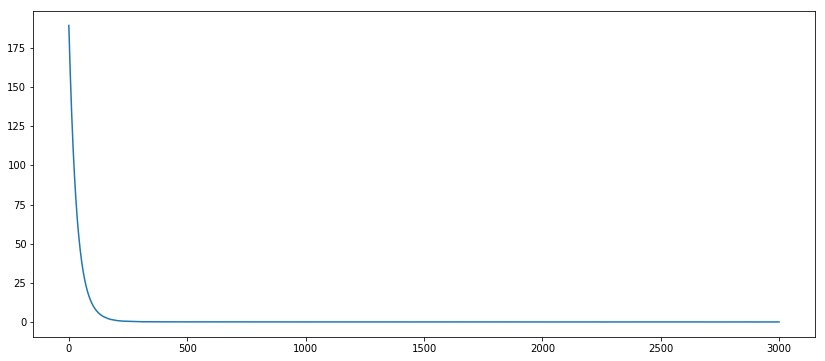

In [70]:
plt.plot(costs)
plt.show()